<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 20px"> 🫀 Stroke Predicition Dataset 🫀</span>
</div>

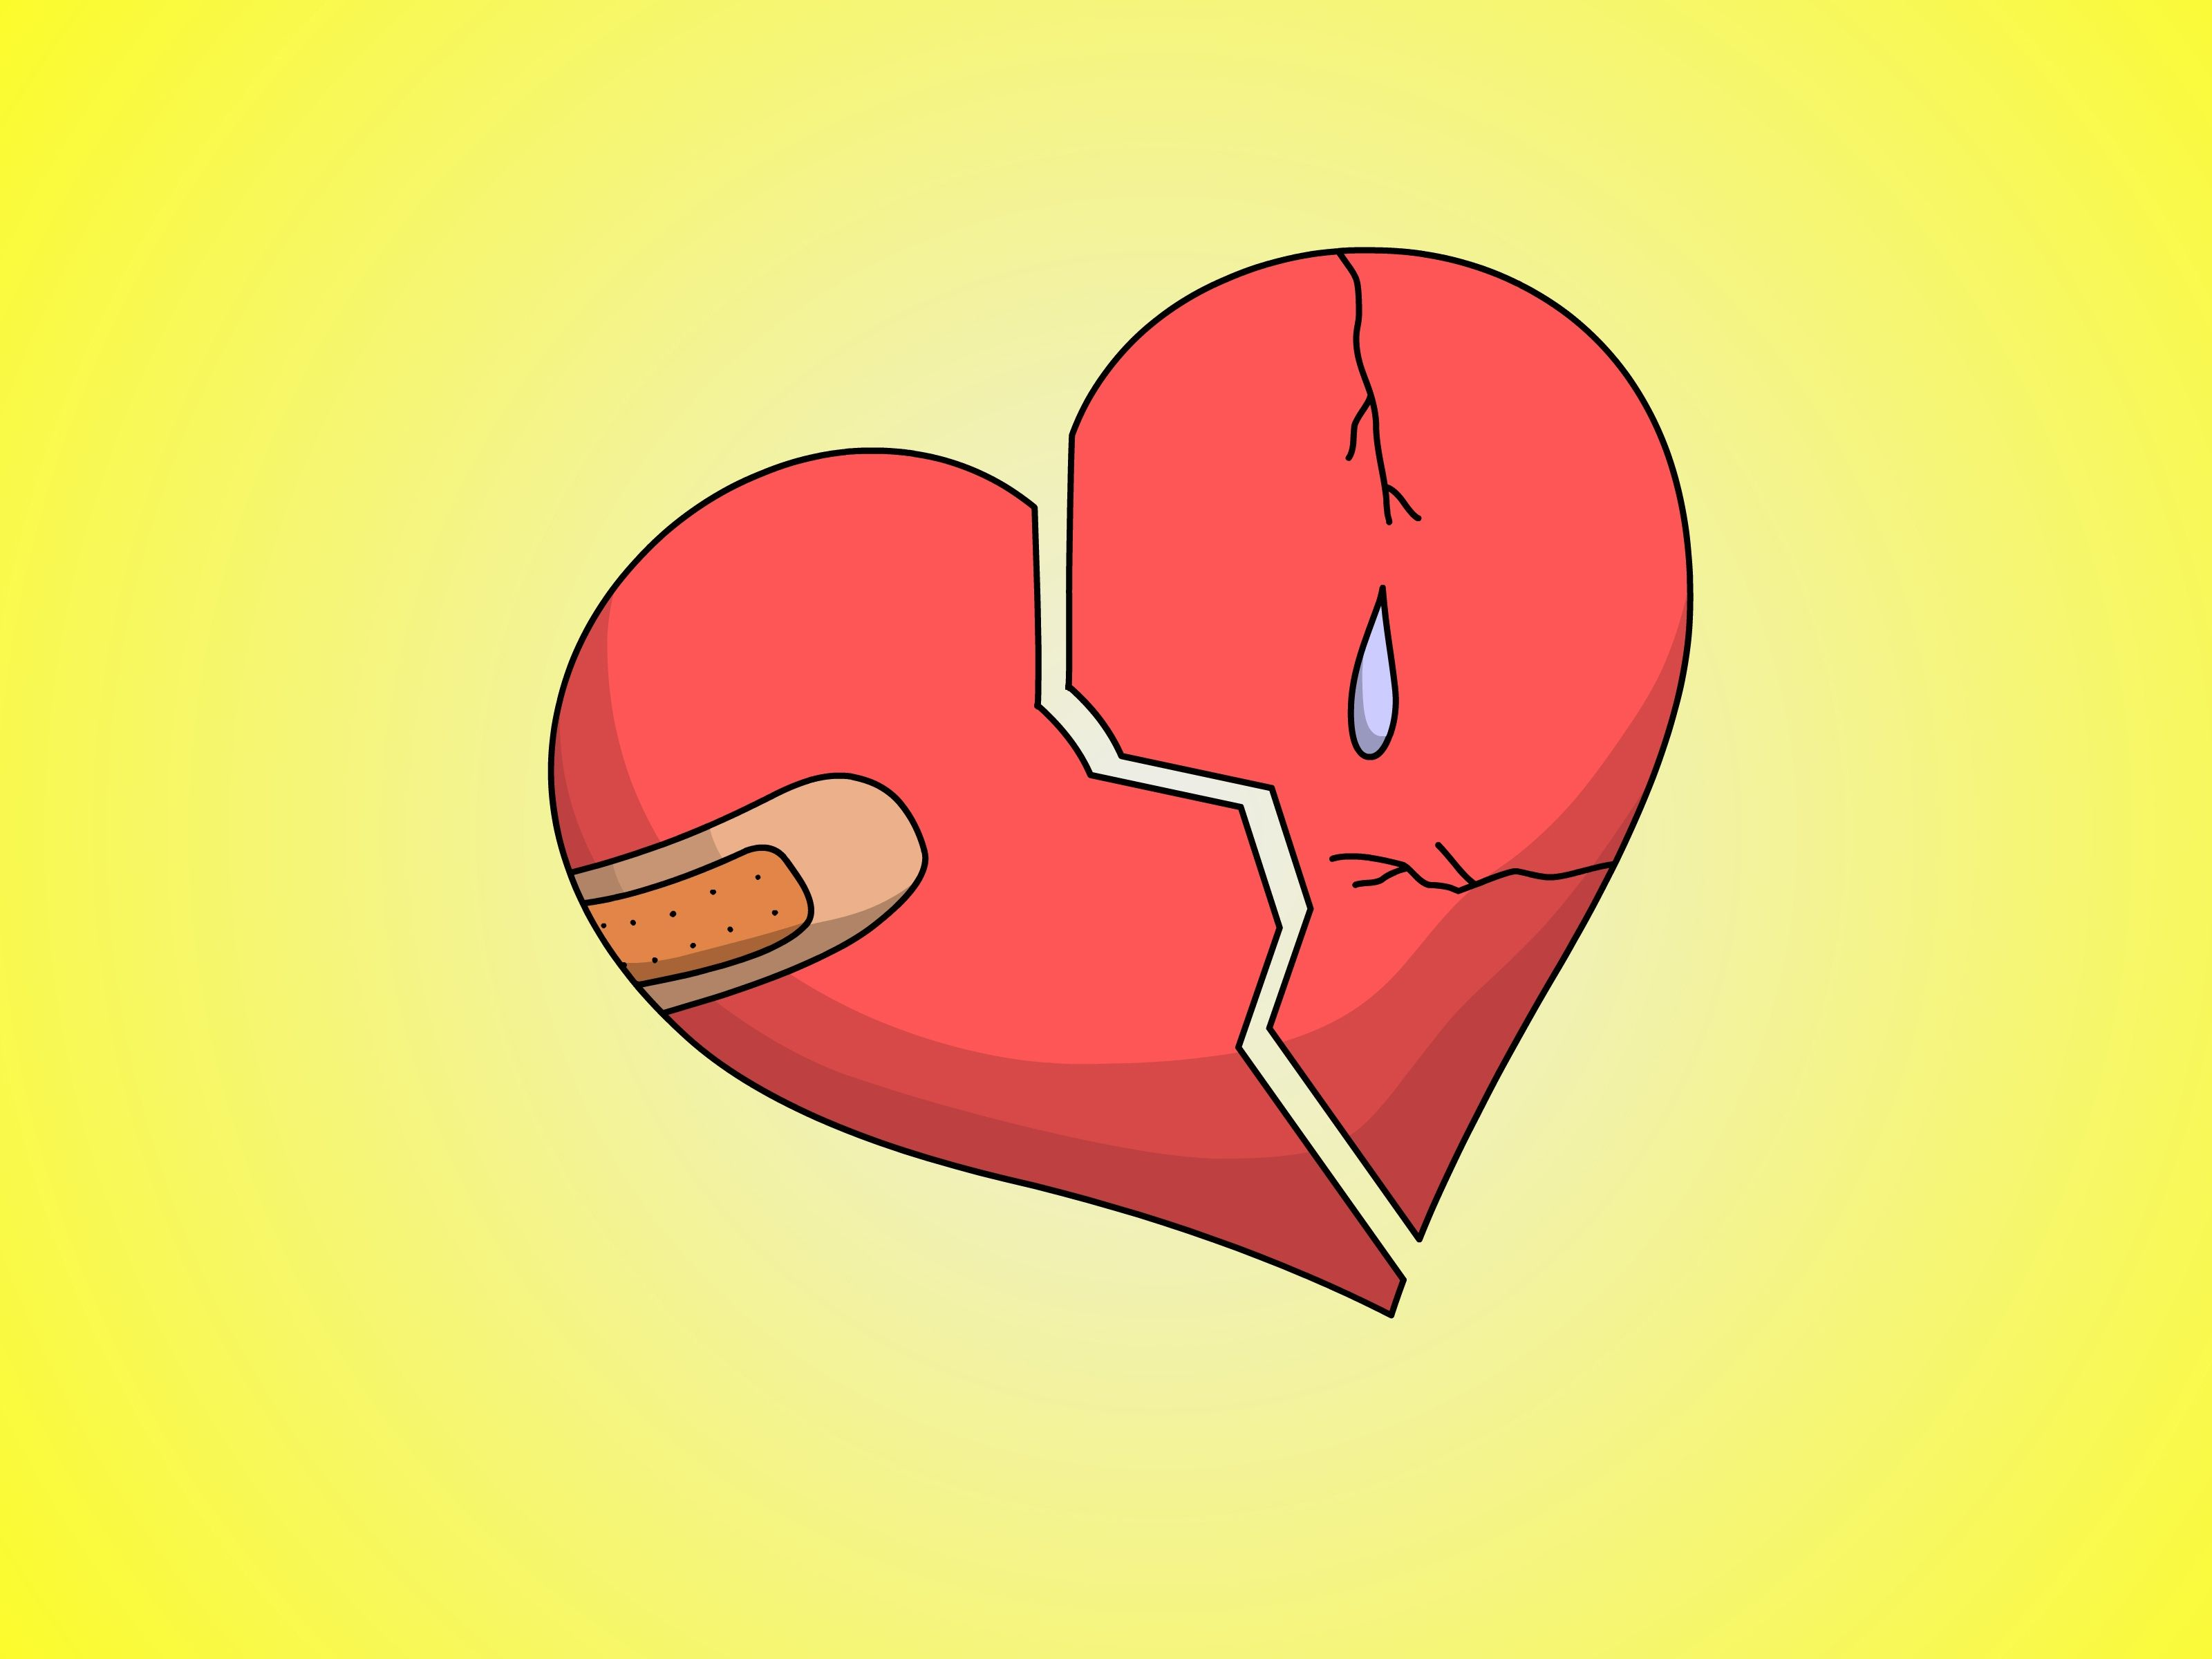

<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 24px">INTRODUCTION 💖</span>
</div>

<div style = 'text-align: left;'>
    <span style="font-family:cursive; font-size: 20px">💡 About the data</span>
</div>

<div>
    <p style="font-family:cursive; font-size: 16px"> 👉<b> Attribute Information:</b> <br> <br> <b>id</b>: unique identifier. <br> <b>gender</b>: "Male", "Female" or "Other" <br> <b>age</b>: age of the patient. <br> <b>hypertension</b>: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension <br> <b>heart_disease</b>: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease. <br> <b>ever_married</b>: "No" or "Yes". <br> <b>work_type</b>: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed". <br> <b>Residence_type</b>: "Rural" or "Urban". <br> <b>avg_glucose_level</b>: average glucose level in blood. <br> <b>bmi</b>: body mass index. <br> <b>smoking_status</b>: "formerly smoked", "never smoked", "smokes" or "Unknown". <br> <b>stroke</b>: 1 if the patient had a stroke or 0 if not. <br>
    </p>
</div>

<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 24px">Table of Contents</span>
</div>

* [Getting to know our data](#info)
* [Data Analysis](#data_analysis)
    * [The Target Varibales](#target)
    * [The Varibale Types](#types)
        * [Numerical Features](#numerical_features)
            * [Outliers](#outliers)
            * [Yeojohnson Transformation](#yeo)
            * [Square root Transformaton](#sqrt)
            * [Equal Frequency Discretisation](#efd)
            * [Equal Width Discretisation](#ewd)
            * [Relationship between Missing values and Target Feature](#missing_vs_target)
        * [Categorical Features](#cat_features)
            * [Number of sub categories present in each categorical feature](#sub_cat)
            * [Work Types](#work_type)
            * [Smoking Status](#smoking)
            * [Hypertension](#hype)
            * [Heart Disease](#heart)
            * [Ever Married](#ever)
            * [Residence Type](#residence)
            * [Gender](#gender)
        * [Rare labels](#rare)
    * [Correlation](#corr)

In [1]:
!pip install feature-engine

import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
dataset = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
print(dataset.shape)

dataset.head()

# Getting to know our data
<a id='info'/>

In [3]:
dataset.info()

> #### Since the stroke is our target class, we need to convert it to object.
> > #### Classification algorithms make sense when the output (independent) feature is a category rather than a discrete or continous values.

> #### hypertension dtype must be an object. Since the data description for our dataset says, 0 if patient doesn't have hypertension and 1 if patient has hypertension.
> #### heart_disease dtype must be an object. Since the data description for our dataset says, 0 if patient doesn't have any heart diseases and 1 if patient has a heart disease.

In [4]:
dataset['hypertension'] = dataset['hypertension'].astype('object')
dataset['heart_disease'] = dataset['heart_disease'].astype('object')

dataset['stroke'] = dataset['stroke'].astype('object')

> #### From the above info() method, we can see that, only bmi feature is having null values.
> > #### We can drop the rows containing null values or we can handle it. Let's see which one works better!

> #### Note: Inorder to save some memory, one way to do that is to, change the dtype of the feautres from int64 or float64 to int32 or float32 respectively.
> > #### Since this is a small dataset, we can just leave it as it is.

In [5]:
dataset.describe()

> #### describe() is used to get descriptive statistics of the dataset.
> #### One way of using this function before further analysis is, we can check the std of each numerical feature in our dataset.
> > #### This helps to get a quick picture of the feature distribution. For example, if the std deviation is 0, we can confirm that all the values in that feature are same. So, we can get rid of that value.
> > #### Higher the std value higher the variance, and lower the std values lower the variance.

# Data Analysis
<a id = 'data_analysis'/>

# The Target Feature
<a id='target'/>

In [6]:
dataset['stroke'].value_counts()

> #### As we can see, our dataset is highly imbalanced. We need to perform appropriate methods inorder to improve the samples of of the minority class i.e., 1 (Patient had a stroke).
> > #### Aboute 95.13% of the data is about people who didn't get stroke (class - 0) and only 4.87% of the data is about people who got stroke (class - 1)

# The Feature Types
<a id='types'/>

In [7]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'object' and feature != 'id']
print("Total number of numerical features: ", len(numerical_features))

print(numerical_features)

In [8]:
categorical_features = [feature for feature in dataset.columns if feature not in numerical_features and feature != 'stroke' and feature != 'id']
print("Total number of categorical features: ", len(categorical_features))

print(categorical_features)

## Numerical Features
<a id='numerical_features'/>

In [9]:
dataset[numerical_features].hist(figsize = (15, 8)) 

plt.show()

> #### As we can see, all the distributions of numerical features are different.
> > #### For example, avg_glucose_level and bmi are right skewed.

> #### So we need to handle these distributions by performing transformations and make them closer to normal distribution inorder to improve the model performance.

# Checking Outliers
<a id='outliers'/>

In [10]:
def check_outliers(df, variable):
    
    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [11]:
for feature in numerical_features:
    check_outliers(dataset, feature)

> #### As we can see, there are lot of outliers present in avg_glucose_level and bmi.
> > #### Note: For the feature bmi, we cannot see the diagonal line because of the presence of extreme values.

## Yeojohnson Transformation
<a id='yeo'/>

> ##### Note: I excluded 'bmi' because it is taking so much time to print the plot and the resultant plot is a straight line. Yeojohnson Transformation won't work for bmi.

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

i = 0
for feature in numerical_features:
    if feature != 'bmi':
        fitted_data, _ = stats.yeojohnson(dataset[feature])
        sns.histplot(fitted_data, kde = True, ax = ax[i]).set(title = feature)
        
        i = i + 1

> #### As we can see yeojohnson transformation is not performing the way we expected.
> > #### Yeojohnson transformation didn't improve the distribution of the feature age at all.
> > #### For avg_glucose_level, we are creating two modes and for bmi feature we are making all the values equal.

In [13]:
temp_data = dataset.copy()
temp_data['avg_glucose_level'], _ = stats.yeojohnson(dataset['avg_glucose_level'])

check_outliers(temp_data, 'avg_glucose_level')

## Square root Transformation
<a id='sqrt'/>

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

i = 0
for feature in numerical_features:
    trans_data = np.sqrt(dataset[feature])
    sns.histplot(trans_data, kde = True, ax = ax[i]).set(title = feature)
    
    i = i + 1

> #### Power Transformation worked pretty well on bmi, we will use this.

In [15]:
temp_data['bmi'] = pow(dataset['bmi'], 0.05)
check_outliers(temp_data, 'bmi')

> #### We still have extreme values in the distribution. So we will perform a trail and error method by transformin this feature during model fitting. 

## Equal Frequency Discretisation
<a id='efd'/>

> #### Equal Frequency Discretisation divides the all the possible values into N intervals. Each interval carries same amount of observations.

> #### This is very useful for the skewed distributions as this method spreads the observations over different intervals (bins).
> > #### Her we divide our continous feature into N quantiles.

In [16]:
from sklearn.model_selection import train_test_split

from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.imputation import RandomSampleImputer

def efd(dataset, intervals, feature_name, verbose = False):
    
    bmi_imputer = RandomSampleImputer(variables = ['bmi'], random_state = 9)
    dataset = bmi_imputer.fit_transform(dataset)
    
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['stroke'], axis = 1), dataset['stroke'], test_size = 0.3, random_state = 9)
    
    disc = EqualFrequencyDiscretiser(q = intervals, variables = [feature_name])
    disc.fit(X_train, y_train)
    
    train_disc = disc.transform(X_train)
    test_disc = disc.transform(X_test)
    
    if verbose == True:
        print(disc.binner_dict_)
    
    obs_per_bucket_train = train_disc.groupby([feature_name])[feature_name].count() / len(train_disc)
    obs_per_bucket_test = test_disc.groupby([feature_name])[feature_name].count() / len(test_disc)
    
    temp_data = pd.concat([obs_per_bucket_train, obs_per_bucket_test], axis=1)
    temp_data.columns = ['train', 'test']
    
    temp_data.plot.bar(figsize = (12, 5))
    
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')
    
    plt.show()

In [17]:
for feature in numerical_features:
    efd(dataset, intervals = 10, feature_name = feature, verbose=True)

> #### As we can see, number of values in both the train and test set are almost equal.
> > #### Play with the number of quantiles, to get familier with the Equal Frequency Discretisation.

In [18]:
to_ewd_10 = ['bmi']

## Equal Width Discretisation
<a id='ewd'/>

> #### In Equal Width Discretisation, we are dividing the number of observations by number of bins.
> > #### This preserves the distribution of the feature.

In [19]:
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.imputation import RandomSampleImputer

def ewd(dataset, intervals, feature_name):

    bmi_imputer = RandomSampleImputer(variables = ['bmi'], random_state = 9)
    dataset = bmi_imputer.fit_transform(dataset)
    
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['stroke'], axis = 1), dataset['stroke'], test_size = 0.3, random_state = 1111)
    
    disc = EqualWidthDiscretiser(bins = intervals, variables = [feature_name])
    disc.fit(X_train, y_train)
    
    train_disc = disc.transform(X_train)
    test_disc = disc.transform(X_test)
    
    obs_per_bucket_train = train_disc.groupby([feature_name])[feature_name].count() / len(train_disc)
    obs_per_bucket_test = test_disc.groupby([feature_name])[feature_name].count() / len(test_disc)
    
    temp_data = pd.concat([obs_per_bucket_train, obs_per_bucket_test], axis=1)
    temp_data.columns = ['train', 'test']
    
    temp_data.plot.bar(figsize = (12, 5))
    
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')
    
    plt.show()

In [20]:
for feature in numerical_features:
    ewd(dataset, intervals = 10, feature_name = feature)

> #### As we can see, the distribution of age is preserved and the number of values in both train and test set are almost equal and in some cases, values in train set more.

> #### As we have less number of observations in avg_glucose_level, we can use Equal Frequency Discretisation of this feature.

# Relationship between Missing values and Target Feature
<a id='missing_vs_target'/>

In [21]:
def analyse_missing_values(dataset, feature):
    dataset = dataset.copy(deep=True)
    
    # If the value for the feature is null we replace count 1 and if not null then its 0
    dataset[feature] = np.where(dataset[feature].isnull(), 1, 0)
    
    temp_data = dataset.groupby(feature)['stroke'].agg(['mean', 'std']) 
    
    temp_data.plot(kind='barh', y='mean', legend=False, xerr='std', title='Stroke', color='green')
    
    plt.show()

In [22]:
analyse_missing_values(dataset, 'bmi')

> #### We have 3.93% of missing values in bmi feature

In [23]:
print("We have {}% of missing values in bmi feature".format(round(dataset['bmi'].isnull().sum() / len(dataset) * 100, 2)))

In [24]:
dataset[dataset['bmi'].isna()]['stroke'].value_counts()

In [25]:
dataset['stroke'].value_counts()

> #### As we can see, out of 249 we have 40 missing values for the stroke = Yes. So, it's better to handle the missing values instead of dropping them.
> > #### We cannot afford to loose more data on minority class, so we handle the missing values.

# Categorical Features
<a id='cat_features'/>

In [26]:
def plot_bar(subplot_titles, feature, plot_title, ncols = 5, width = 1500, height = 500):
    
    fig = make_subplots(rows = 1, cols = ncols, subplot_titles = subplot_titles, x_title = 'Stroke', y_title = 'Count')

    col_inc = 1
    for subtype in subplot_titles:
        bar_dict = dataset[dataset[feature] == subtype]['stroke'].value_counts().to_dict()
        fig.add_trace(go.Bar(x = list(bar_dict.keys()), y = list(bar_dict.values()), name = subtype), row = 1, col = col_inc)

        col_inc = col_inc + 1

    fig.update_layout(width = width, height = height, title = plot_title)

    fig.show()

> #### The above method is used plotting bar plot containing different sub categories present in a categorical feature.

# Number of categories present in each categorical feature
<a id='sub_cat'/>

In [27]:
dataset[categorical_features].nunique().sort_values(ascending = False).plot.bar(figsize = (10, 5))

plt.show()

> #### The above plot shows how the cardinality of each categorical feature. 
> > #### Highest being the work_type (i.e., there are 5 different sub categories in work_type feature)

In [28]:
def cat_encode(value):
    encode_dict = {0: 'No', 1: 'Yes'}
    
    return encode_dict[value]

for feature in ['hypertension', 'heart_disease', 'stroke']:
    dataset[feature] = dataset[feature].apply(cat_encode)

> #### Since the data is imbalanced we will see the plots that are biased. But to get to know the original data, we must perform analysis.

## Work Type
<a id='work_type'/>

In [29]:
data = dataset['work_type'].value_counts(ascending = False)

fig = px.bar(data, x = data.index, y = data.values)
fig.update_layout(width = 800, height = 400, xaxis_title = 'Work Types', yaxis_title = 'Count', font = dict(family = 'Cavolini', size = 16, color = 'black'))

fig.show()

> #### We have more data of the people who belong to the worktype 'Private'. Let's see how many private employeers got stroke.

In [30]:
bar_dict = dataset[dataset['work_type'] == 'Private']['stroke'].value_counts().to_dict()

data = [go.Bar(x = list(bar_dict.keys()), y = list(bar_dict.values()))]
layout = go.Layout()

fig = go.Figure(data, layout)
fig.update_layout(width = 600, height = 500, title = '{} vs Stroke'.format('Private'), xaxis_title = 'Stroke', yaxis_title = 'Count', 
                  font = dict(family = 'Cavolini', size = 16, color = 'black'))

fig.show()

> #### Very few people got stoke

In [31]:
plot_bar(subplot_titles = list(dataset['work_type'].value_counts(ascending = False).index), feature = 'work_type', plot_title = 'Work Types')

> #### According to the dataset, people who never worked didn't get a stroke but who are working privately got more strokes than others.
> > #### In all other cases, we can see that people who got stroke are very few.

## Smoking Status
<a id='smoking'>

In [32]:
plot_bar(subplot_titles = list(dataset['smoking_status'].value_counts(ascending = False).index), feature = 'smoking_status', ncols = 4, plot_title = 'Smoking Status')

> #### Interesting fact here is that, people who never smoked got strokes more than any other group followed by people who formely smoked then unknown and then people who smoke.

> #### As we can see people who smokes got less strokes

## Hypertension
<a id='hype'/>

In [33]:
plot_bar(subplot_titles = list(dataset['hypertension'].value_counts(ascending = False).index), feature = 'hypertension', ncols = 2, width = 800, height = 400, plot_title = 'Hypertension')

## Heart Disease
<a id='heart'/>

In [34]:
plot_bar(subplot_titles = list(dataset['heart_disease'].value_counts(ascending = False).index), feature = 'heart_disease', ncols = 2, width = 800, height = 400, plot_title = 'Heat Disease')

## Ever Married
<a id='ever'/>

In [35]:
plot_bar(subplot_titles = list(dataset['ever_married'].value_counts(ascending = False).index), feature = 'ever_married', ncols = 2, width = 800, height = 400, plot_title = 'Ever Married')

> #### Married people got more strokes than people who are not married.

## Residence Type
<a id='residence'/>

In [36]:
plot_bar(subplot_titles = list(dataset['Residence_type'].value_counts(ascending = False).index), feature = 'Residence_type', ncols = 2, width = 800, height = 400, plot_title = 'Residence Type')

> #### People who live Urban areas are more prone to heart stroke than people who live in rural areas.

## Gender
<a id='gender'/>

In [37]:
plot_bar(subplot_titles = list(dataset['gender'].value_counts(ascending = False).index), feature = 'gender', ncols = 3, width = 800, height = 400, plot_title = 'Gender')

> #### We have only One observation with gender as Other. This won't help us in improving the performance since there is only one row of data.
> > #### To avoid the extra dimension for the age feature we can delete the row containing gender = Other.

# Rare Labels
<a id='rare'/>

> #### It is important to handle the rare labels in our dataset because of the following reason:
> > #### Rare labels can cause the dimension problem when we are trying to score new data. When we split our dataset into train and test split, we might miss some rare values in train set and our model will not recognise the new values in test set and raises the error. In order to solve this, we need to handle rare values by combining all the rare values into one category.

In [38]:
def analyse_rare_labels(dataset, feature, rare_precentage):
    dataset = dataset.copy()
    
    # Detemining the percentage of observation per category.
    temp_data = dataset.groupby(feature)['stroke'].count() / len(dataset) 
    
    # If the values of the category are less than the rare percentage (given by the user) then, we will return that category along with its percentage in total dataset.
    return temp_data[temp_data < rare_precentage]

for feature in categorical_features:
    print(feature, '--->', analyse_rare_labels(dataset, feature, 0.05))

> #### Here we can see, in our work_type feature, the values belong to Never_worked category are less than 1%.

In [39]:
dataset[dataset['work_type'] == 'Never_worked']

# Correlation
<a id='corr'/>

In [40]:
px.imshow(dataset.corr(), text_auto = True, aspect = 'auto', labels = dict(x = 'Correlation between numerical features'))

> #### We don't have any high correlated features, the max correlation we can find is 33% between age and bmi. We can simply ignore it since the correlation is very low.

<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 24px">⚠️ Work Inprogress ⚠️</span>
</div>

<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 24px">In the next version of this notebook, I will explain my approach at the starting of the notebook and I will perform feature engineering, feature selection and model building.</span>
</div>

<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 24px">Thank you.</span>
</div>